In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("sales_data_with_discounts.csv")


In [ ]:
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [ ]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [ ]:
data.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [ ]:
#Identifying Numerical Columns & printing Numerical
numerical_columns = data.select_dtypes(include=['float64','int64']).columns
print(numerical_columns)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [ ]:
#Calculating Basic Statistics
mean = data[numerical_columns].mean()
median = data[numerical_columns].median()
mode = data[numerical_columns].mode().iloc[0] #First mode
std_dev = data[numerical_columns].std()

In [ ]:
#Printing Basic Statistics
print("mean:\n",mean)
print("_____________________________________")
print("median:\n",median)
print("_____________________________________")
print("mode:\n",mode)
print("_____________________________________")
print("std:\n",std_dev)

mean:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64
_____________________________________
median:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64
_____________________________________
mode:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64
_____________________________________
std:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.

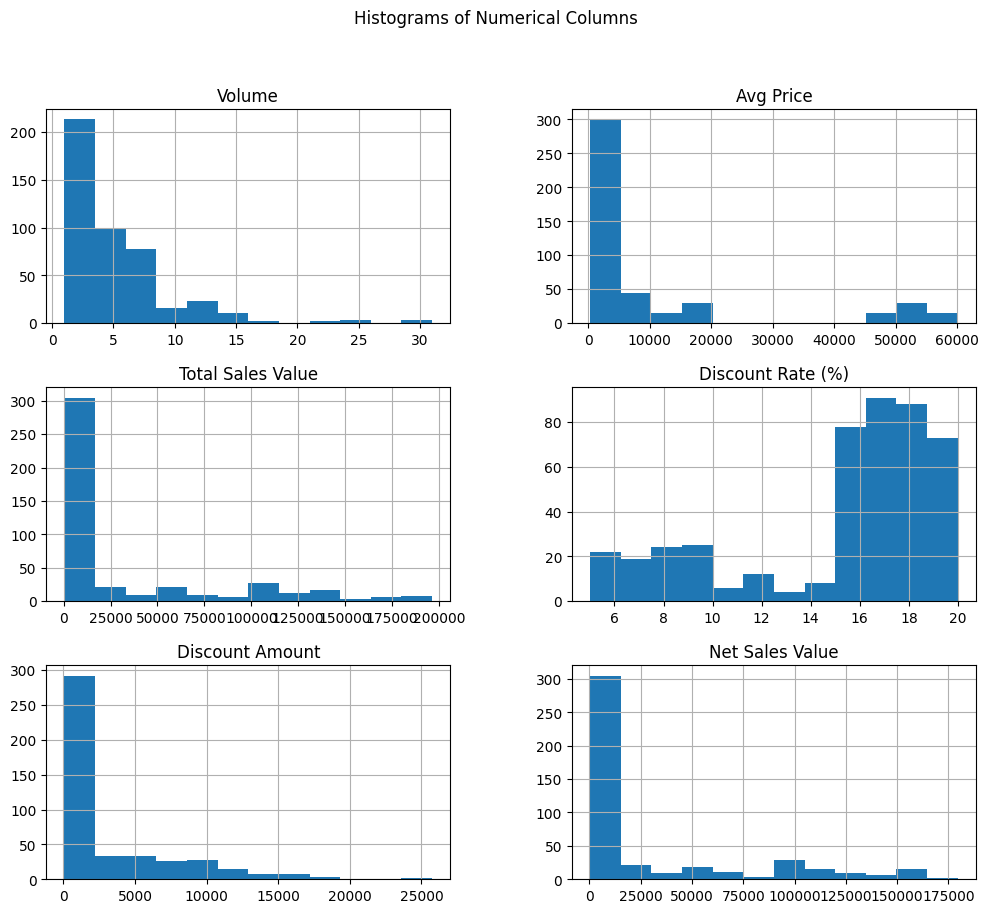

In [ ]:
#Data Visualization - Histograms for numerical columns
data[numerical_columns].hist(bins=12,figsize=(12,10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

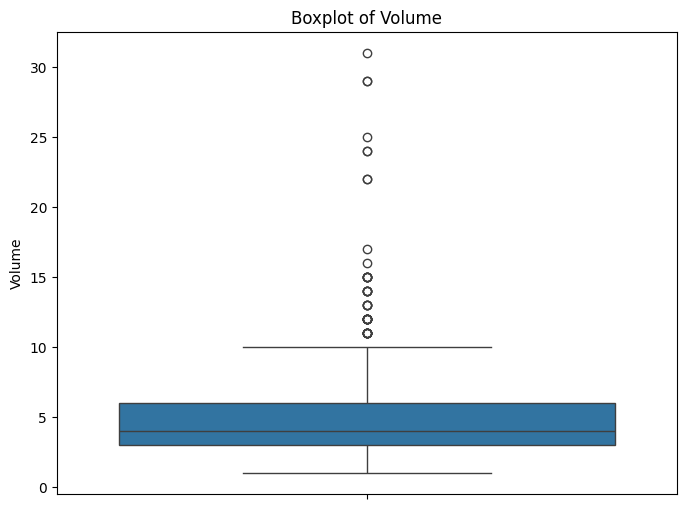

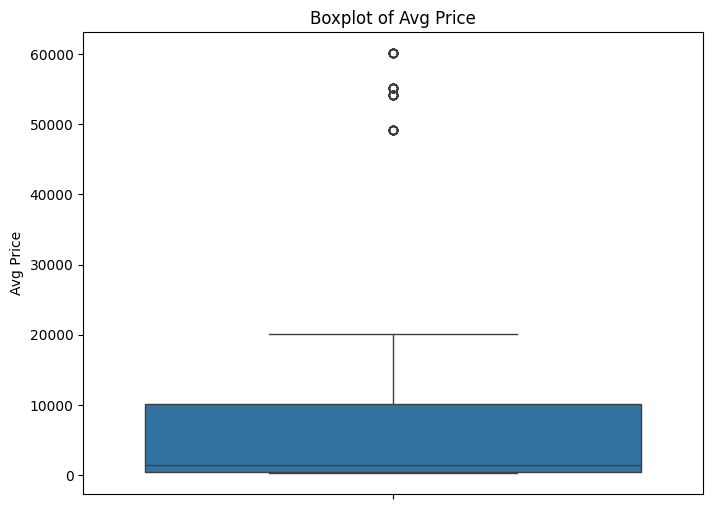

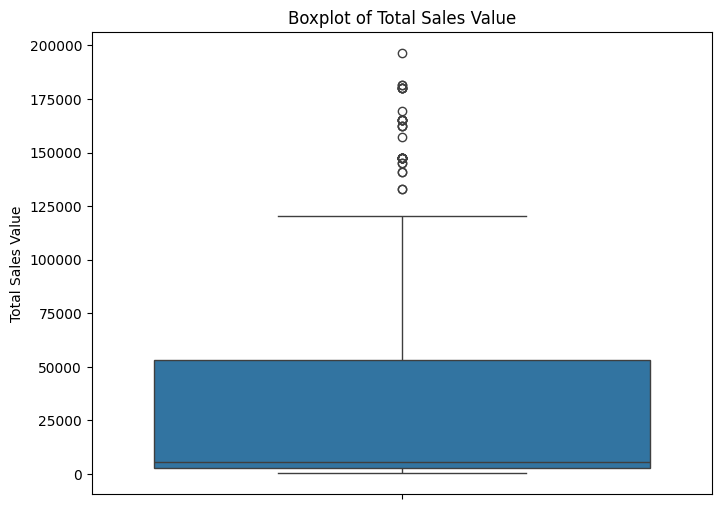

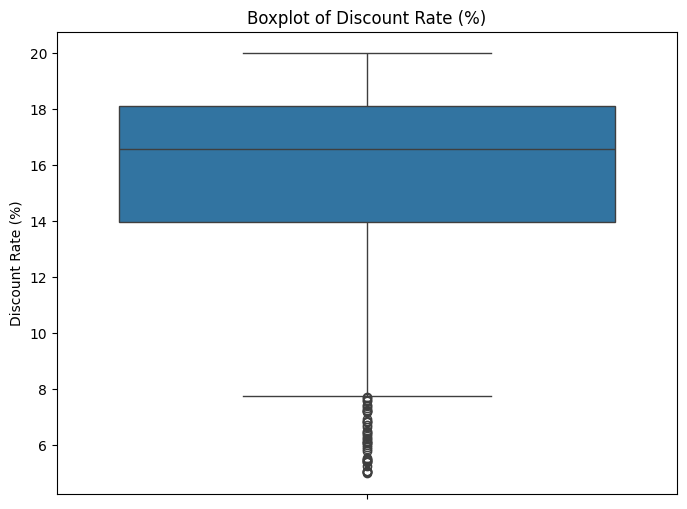

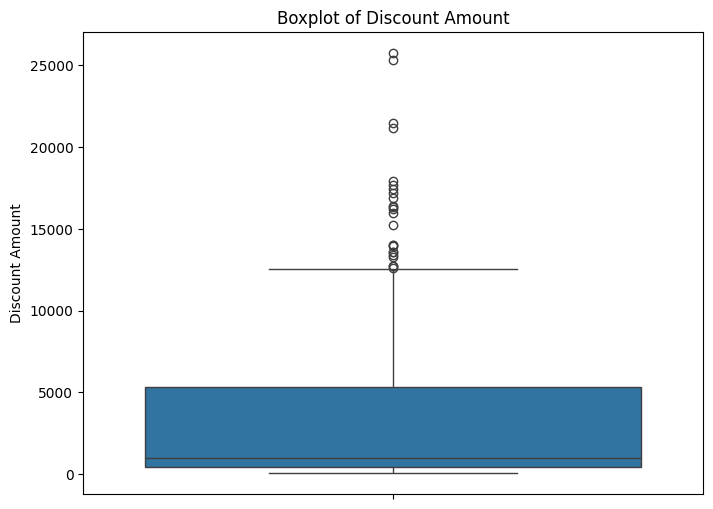

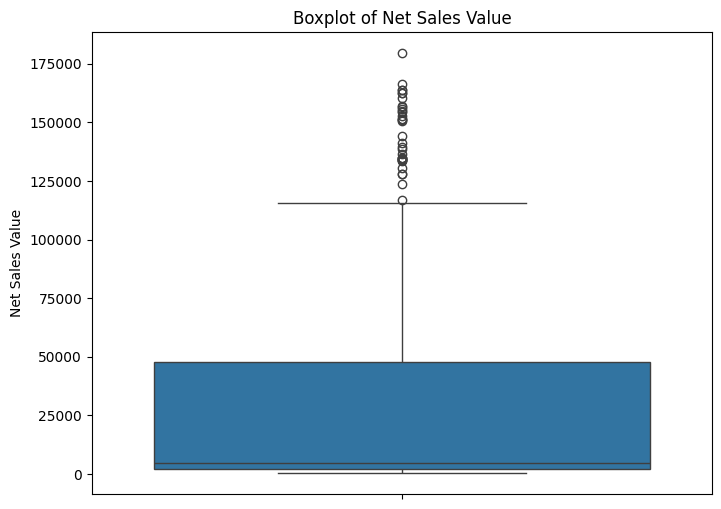

In [ ]:
for columns in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data = data[columns])
    plt.title(f"Boxplot of {columns}")
    plt.show()

In [ ]:
#Identifying Categorical columns $ Printing Categorical Columns
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


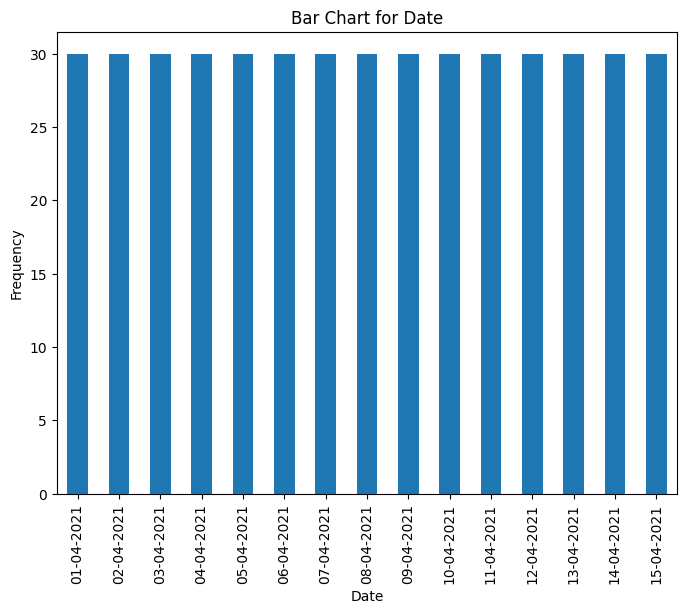

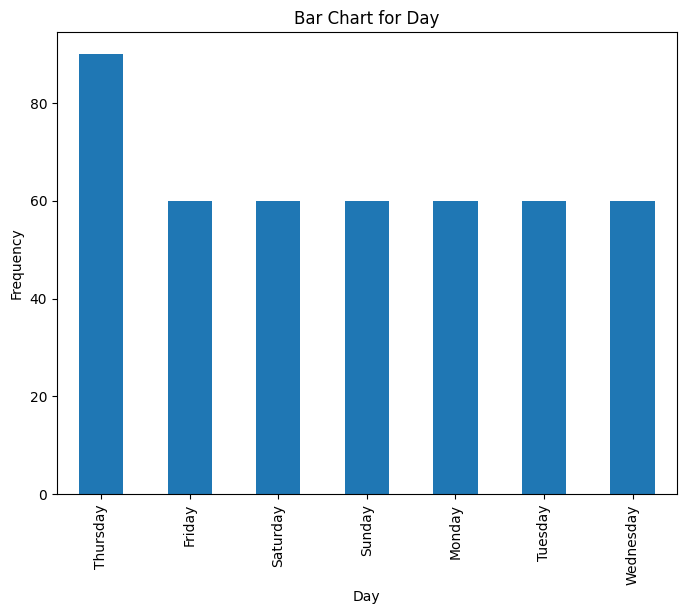

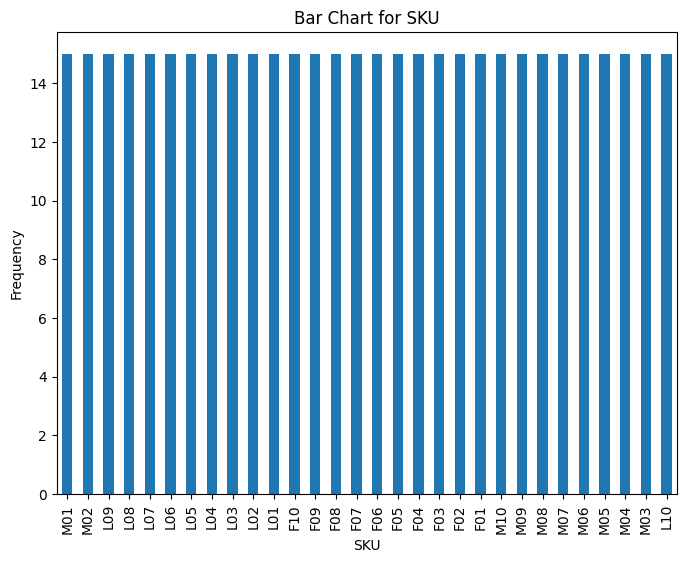

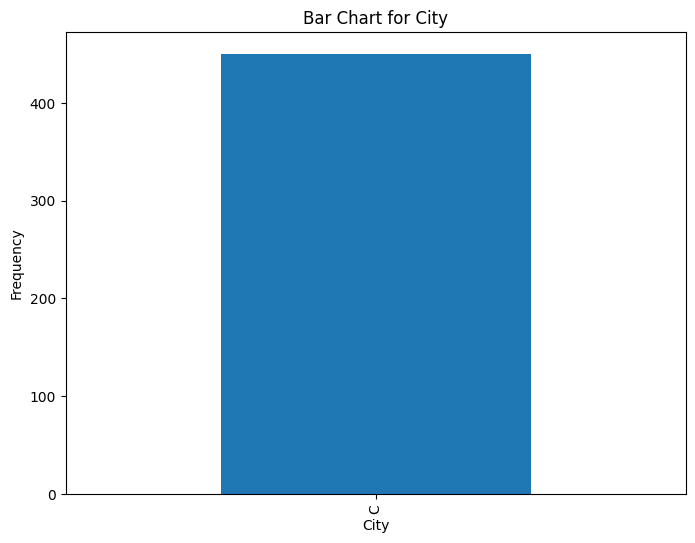

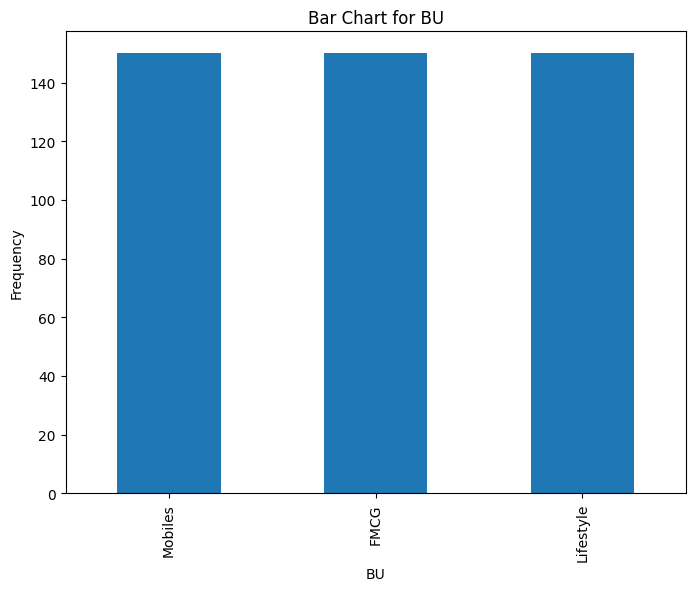

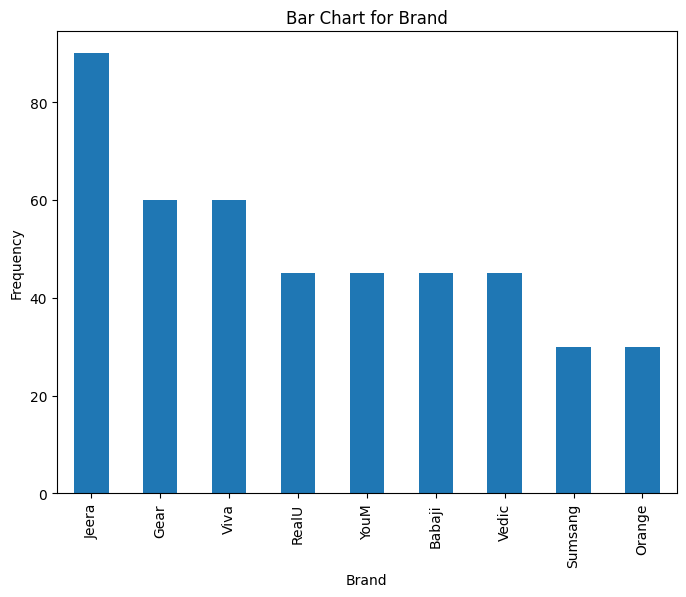

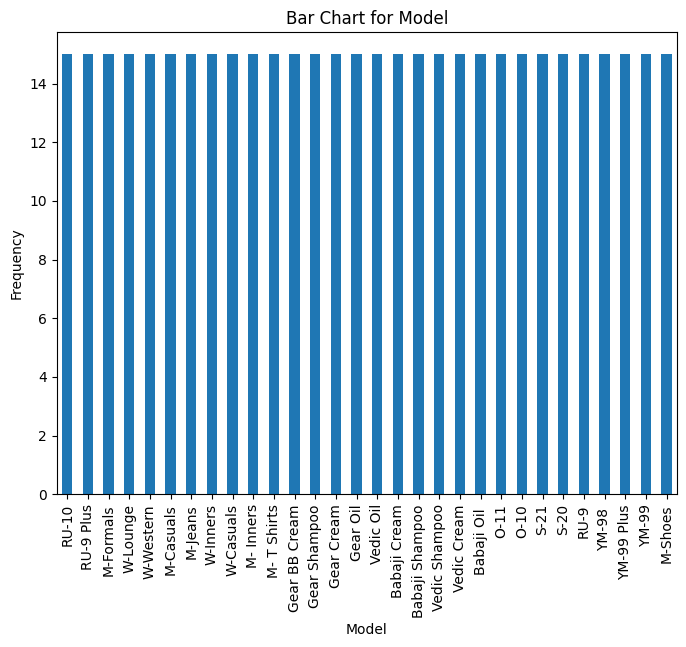

In [ ]:
for columns in categorical_columns:
    plt.figure(figsize=(8,6))
    data[columns].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart for {columns}")
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# Standardization of Numerical Variables
standardized_data = (data[numerical_columns] - mean)/std_dev
print("Standardized Data:\n",standardized_data.head())

Standardized Data:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  
0         2.801638  
1         1.269613  
2         1.543957  
3         1.763847  
4        -0.227342  


In [ ]:
# Conversion of Categorical Data into Dummy Variables
dummy_data = pd.get_dummies(data[categorical_columns],drop_first=True)
print("Dummy Variables:")
print(dummy_data.head())

Dummy Variables:
   Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  Date_05-04-2021  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Date_06-04-2021  Date_07-04-2021  Date_08-04-2021  Date_09-04-2021  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Date_10-04-2021  Date_11-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False       

In [ ]:
# Combining the standardized numerical data with dummy variables
final_data = pd.concat([standardized_data,dummy_data],axis=1)
print("Final Data:")
print(final_data.head())

Final Data:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.801638            False            False            False   
1         1.269613            False            False            False   
2         1.543957            False            False            False   
3         1.763847            False            False            False   
4        -0.227342            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \